Members: Muyo, Mark Danielle | Perez, Cris John<br>
Course and Section: CPE 019 - CPE32S9<br>
Date of Submission: March 5, 2024<br>
Instructor: Engr. Roman Richard<br>

## **Prelim Examination**

* Choose any dataset applicable for classification and/or prediction analysis problems.
* Show the application of the following algorithms:
  * Linear Regression
    * Singular LR
    * Multiple LR
    * Polynomial LR
  * Logistic Regression
  * Decision Tree
  * Random Forest
* Provide Evaluation reports for all models



## **SINGULAR LINEAR REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy
sns.set_style("whitegrid")
sns.set_context("poster")
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df = pd.read_csv("Advertising.csv", index_col = 0)
print("Size of the data:", df.shape)
df.head()

Size of the data: (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


Since *Sales* is our target variable, we should identify which variable correlates the most with *Sales*.

As we can see, *TV* has the highest correlation with *Sales*.

Let's visualize the relationship of variables using scatterplots.

Text(0.5, 1.0, 'Sales vs Newspaper')

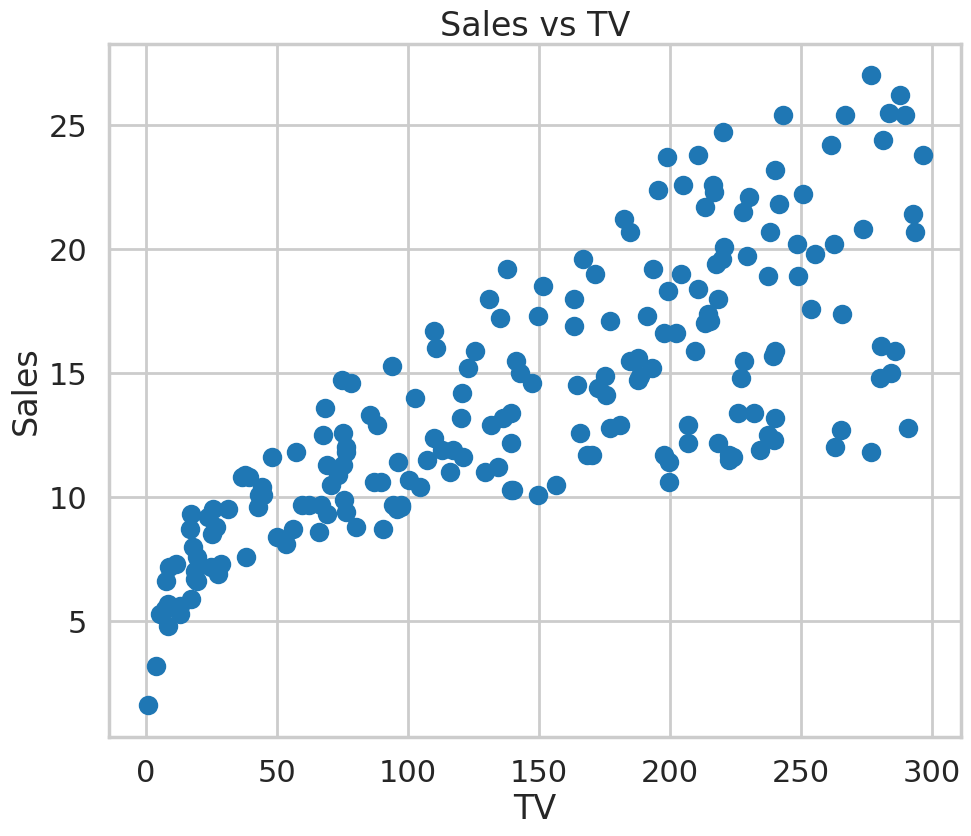

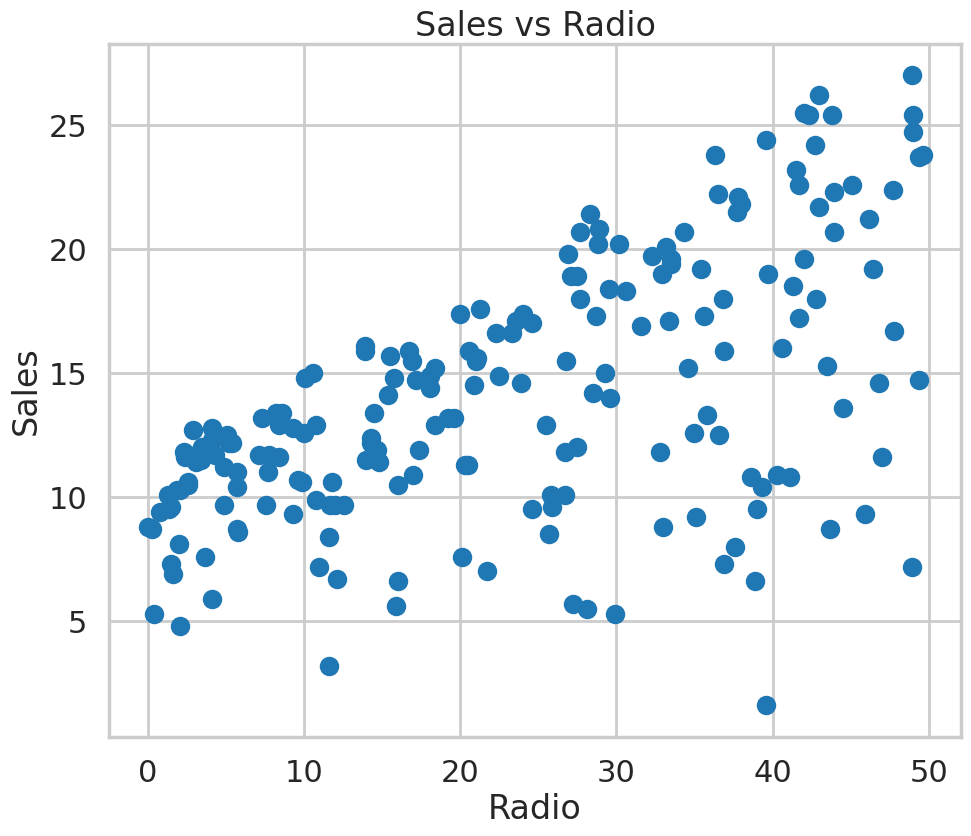

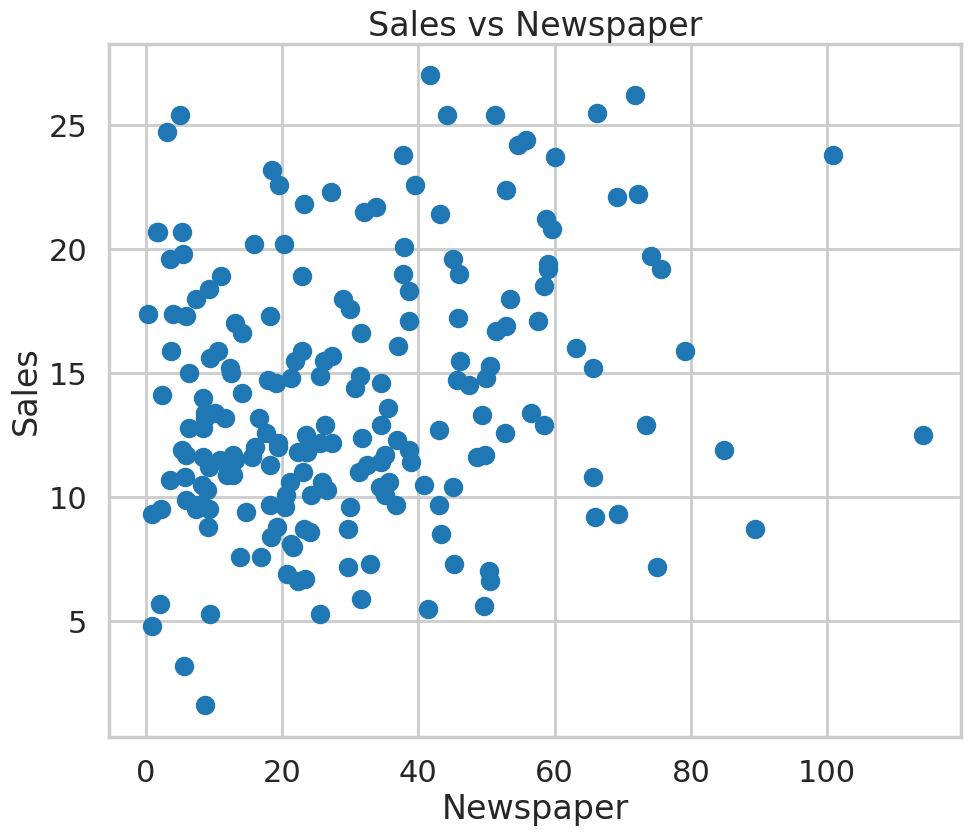

In [ ]:
f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["TV"], df["Sales"])
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("Sales vs TV")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Radio"], df["Sales"])
plt.xlabel("Radio")
plt.ylabel("Sales")
plt.title("Sales vs Radio")

f, ax = plt.subplots(figsize=(11, 9))
plt.scatter(df["Newspaper"], df["Sales"])
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.title("Sales vs Newspaper")

In [ ]:
x = df.drop("Sales", axis = 1)
y = df["Sales"]

print(f"==x (predictors)==\nSize: {x.shape}\n{x.head()}\n Data Type: {type(x.head())} ")
print(f"\n==y (target)==\nSize: {y.shape}\n{y.head()}\n{type(y.head())}")

==x (predictors)==
Size: (200, 3)
      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
 Data Type: <class 'pandas.core.frame.DataFrame'> 

==y (target)==
Size: (200,)
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64
<class 'pandas.core.series.Series'>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



In [ ]:
df = pd.read_csv("Advertising.csv", index_col = 0)

In [ ]:
x = df[['TV']]
y = df['Sales']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
regression_model = LinearRegression()
regression_model.fit(x, y)

LinearRegression()

In [ ]:
y_pred = regression_model.predict(x)

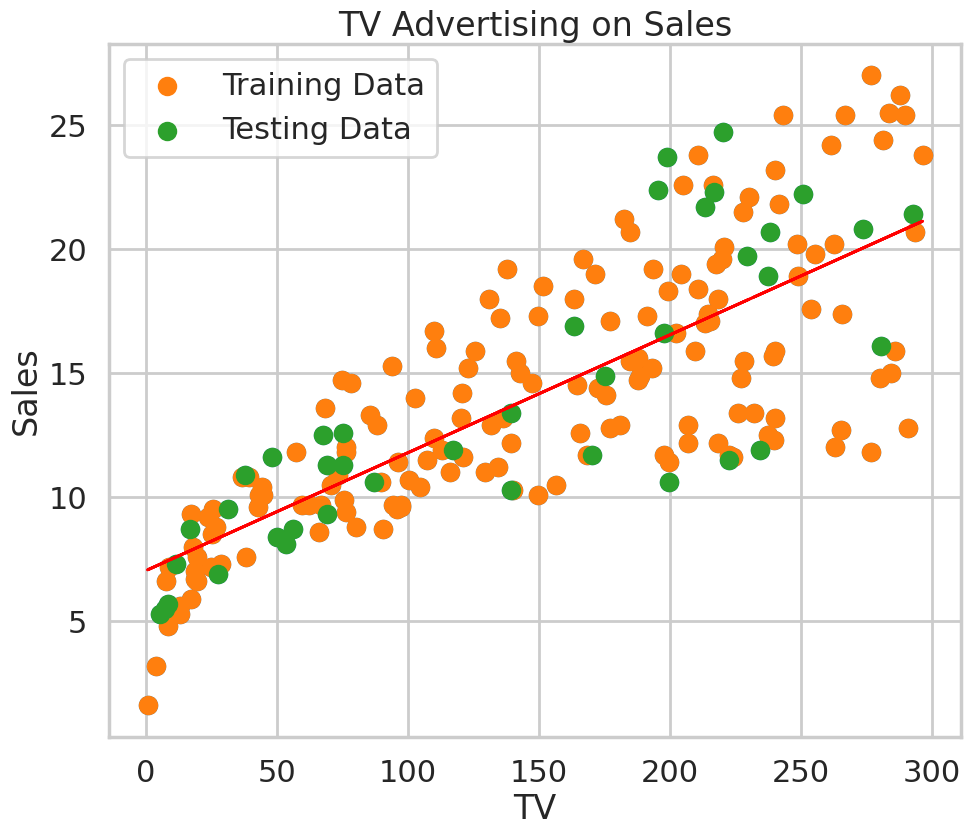

In [ ]:
plt.figure(figsize=(11, 9))
plt.scatter(df["TV"], df["Sales"])
plt.plot(df["TV"], y_pred, color='red', linewidth=2)
plt.scatter(X_train['TV'], y_train, label='Training Data')
plt.scatter(X_test['TV'], y_test, label='Testing Data')
plt.plot(df['TV'], y_pred, color='red', linewidth=2)
plt.xlabel("TV")
plt.ylabel("Sales")
plt.title("TV Advertising on Sales")
plt.legend()
plt.show()

In [ ]:
r_squared = regression_model.score(X, y)
print(f"R-squared: {r_squared}")

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.611875050850071
Mean Squared Error: 10.512652915656757
Mean Absolute Error: 2.549806038927486


**EVALUATION REPORT**

The linear regression model was applied to predict sales based on TV advertising expenditure. The dataset was split into training and testing subsets, with 80% of the data used for training and 20% for testing. The model was fitted to the training data, and predictions were made on both the training and testing data. The scatter plot visualized the relationship between TV advertising and sales, with the regression line representing the model's predictions. The evaluation of the model's performance requires further analysis, including metrics such as mean squared error or R-squared, to assess the accuracy and goodness-of-fit.

## **MULTIPLE LINEAR REGRESSION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
data = pd.read_csv('heart.data.csv')

In [ ]:
X = data[['biking', 'smoking']]
y = data['heart.disease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
biking_range = np.linspace(min(data['biking']), max(data['biking']), 100)
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
sns.set(style="whitegrid", palette=custom_palette)
sns.set_context("paper", font_scale=1.2)

In [ ]:
smoking_min = min(data['smoking'])
smoking_mean = np.mean(data['smoking'])
smoking_max = max(data['smoking'])

In [ ]:
pred_min = model.predict([[b, smoking_min] for b in biking_range])
pred_mean = model.predict([[b, smoking_mean] for b in biking_range])
pred_max = model.predict([[b, smoking_max] for b in biking_range])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


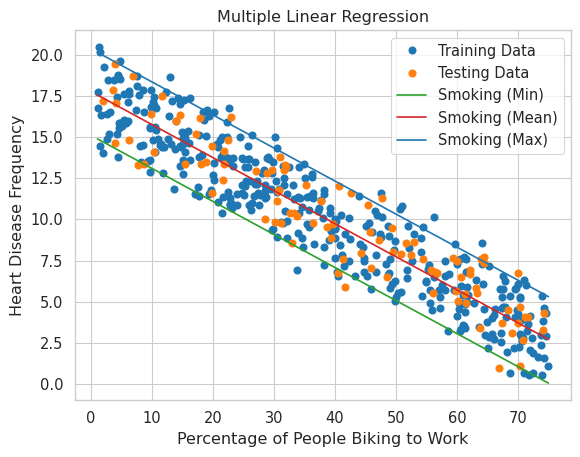

In [ ]:
plt.plot(X_train['biking'], y_train, 'o', label='Training Data')
plt.plot(X_test['biking'], y_test, 'o', label='Testing Data')
plt.plot(biking_range, pred_min, label='Smoking (Min)')
plt.plot(biking_range, pred_mean, label='Smoking (Mean)')
plt.plot(biking_range, pred_max, label='Smoking (Max)')
plt.xlabel('Percentage of People Biking to Work')
plt.ylabel('Heart Disease Frequency')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print("R-squared:", r2)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y, y_pred)
print("Mean Absolute Error:", mae)

R-squared: 0.9796057917296075
Mean Squared Error: 0.42542446810267653
Mean Absolute Error: 0.5156250551503306


**EVALUATION REPORT**

This is a multiple linear regression to predict the occurrence of heart disease based on the percentage of individuals biking to work and their smoking habits. The dataset is divided into training and testing sets, with 80% allocated for training and 20% for testing. The model is trained on the training data, and predictions are generated for both the training and testing datasets. The scatter plot illustrates the correlation between the biking percentage and heart disease frequency, with separate lines representing the model's predictions for different smoking levels (minimum, mean, and maximum).

## **POLYNOMIAL LINEAR REGRESSION**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('Age to Heart Risk.csv')

In [ ]:
df.head(10)

,Age,Heart Disease (%)
0,10,1
1,11,1
2,12,1
3,13,1
4,14,1
5,15,1
6,16,5
7,17,5
8,18,10
9,19,10


In [ ]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1].values

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X_train)
X_poly

array([[1.000e+00, 6.500e+01, 4.225e+03],
       [1.000e+00, 7.900e+01, 6.241e+03],
       [1.000e+00, 7.200e+01, 5.184e+03],
       [1.000e+00, 5.300e+01, 2.809e+03],
       [1.000e+00, 1.400e+01, 1.960e+02],
       [1.000e+00, 7.500e+01, 5.625e+03],
       [1.000e+00, 6.000e+01, 3.600e+03],
       [1.000e+00, 1.200e+01, 1.440e+02],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 2.100e+01, 4.410e+02],
       [1.000e+00, 1.300e+01, 1.690e+02],
       [1.000e+00, 6.400e+01, 4.096e+03],
       [1.000e+00, 5.500e+01, 3.025e+03],
       [1.000e+00, 2.000e+01, 4.000e+02],
       [1.000e+00, 5.100e+01, 2.601e+03],
       [1.000e+00, 5.900e+01, 3.481e+03],
       [1.000e+00, 6.300e+01, 3.969e+03],
       [1.000e+00, 6.700e+01, 4.489e+03],
       [1.000e+00, 4.200e+01, 1.764e+03],
       [1.000e+00, 2.400e+01, 5.760e+02],
       [1.000e+00, 7.800e+01, 6.084e+03],
       [1.000e+00, 2.900e+01, 8.410e+02],
       [1.000e+00, 3.900e+01, 1.521e+03],
       [1.000e+00, 6.200e+01, 3.84

In [ ]:
polyreg = LinearRegression()
polyreg.fit(X_poly, y_train)

LinearRegression()

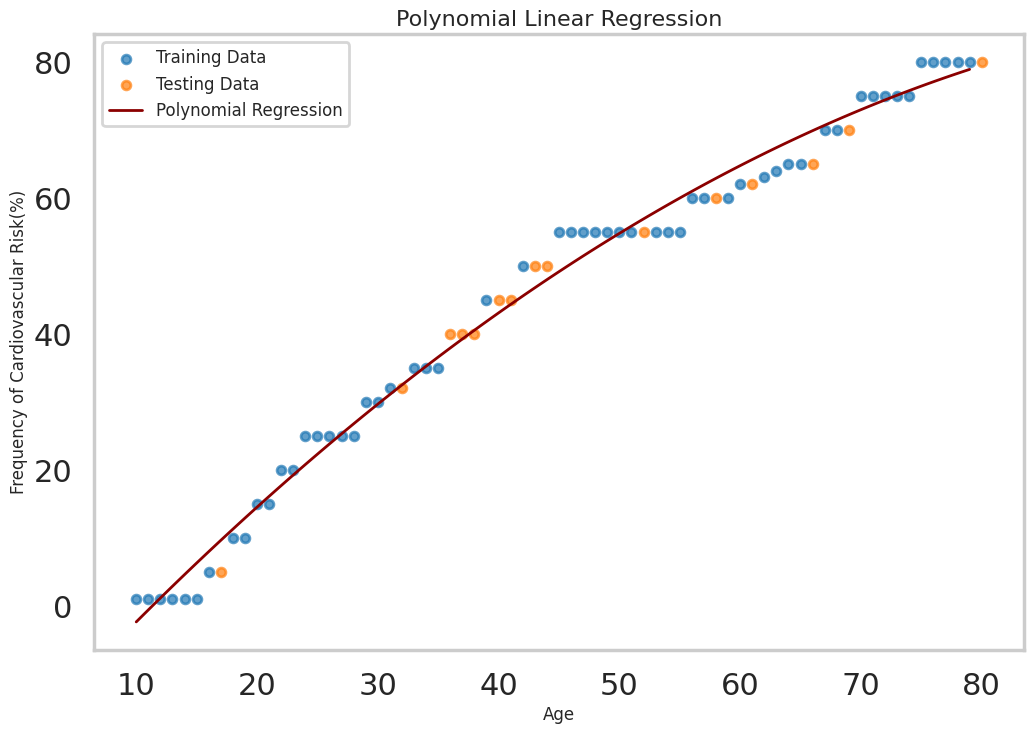

In [ ]:
x_smooth = np.linspace(X_train.min(), X_train.max(), 100)
y_smooth = polyreg.predict(poly.transform(x_smooth.reshape(-1, 1)))

plt.figure(figsize=(12, 8))
plt.scatter(X_train, y_train, label='Training Data', alpha=0.7, s=40)
plt.scatter(X_test, y_test, label='Testing Data', alpha=0.7, s=40)
plt.plot(x_smooth, polyreg.predict(poly.fit_transform(x_smooth.reshape(-1, 1))), color='#8B0000', label='Polynomial Regression', linewidth=2)
plt.title('Polynomial Linear Regression', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency of Cardiovascular Risk(%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(False)
plt.show()

In [ ]:
y_train_pred = polyreg.predict(X_poly)
y_test_pred = polyreg.predict(poly.transform(X_test))

print("Training Set")
print("R-squared:", r2_score(y_train, y_train_pred))
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print()
print("Testing Set")
print("R-squared:", r2_score(y_test, y_test_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))

Training Set
R-squared: 0.9892814695720945
Mean Squared Error: 7.073888292544261
Mean Absolute Error: 2.2223654606587715

Testing Set
R-squared: 0.9777706260174112
Mean Squared Error: 6.6464840235763605
Mean Absolute Error: 2.1598741002478374


**EVALUATION REPORT**

This LR aimed to predict the frequency of cardiovascular risk based on age using polynomial regression. The dataset was divided into training and testing sets, and a second-degree polynomial regression model was fitted to the training data. The model was then evaluated on both the training and testing sets. The polynomial regression model exhibited strong performance on both sets, with high R-squared values of 0.989 for the training set and 0.978 for the testing set. The mean squared error was 7.07 for the training set and 6.65 for the testing set, indicating a good fit of the model to the data. Additionally, the mean absolute error was 2.22 for the training set and 2.16 for the testing set, suggesting that the model's predictions were close to the actual values. Overall, this project demonstrated that polynomial regression can be an effective method for predicting cardiovascular risk based on age.

## **Logistic Regression**

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the dataset from uci

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


In [ ]:
y

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
...,...
3805,Osmancik
3806,Osmancik
3807,Osmancik
3808,Osmancik


Combine features and target

In [ ]:
rice = pd.concat([X, y], axis=1, join='inner')
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik


Change the values of Class to binary values (1 and 0)

0 - Cammeo<br>
1 - Osmancik

In [ ]:
rice["Class"] = rice["Class"].apply(lambda toLabel: 0 if toLabel == 'Cammeo' else 1)
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,0
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,0
...,...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,1
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,1
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,1
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,1


In [ ]:
rice.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934,0.572178
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239,0.494828
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413,0.000000
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862,0.000000
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361,1.000000
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562,1.000000
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050,1.000000


Split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Create the model

In [ ]:
from sklearn.linear_model import LogisticRegression

ricelr = LogisticRegression(random_state=42)
ricelr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

Visualization of the model

In [ ]:
rice.corr()['Class']

Area                -0.746400
Perimeter           -0.806572
Major_Axis_Length   -0.827824
Minor_Axis_Length   -0.370355
Eccentricity        -0.588916
Convex_Area         -0.750424
Extent               0.117727
Class                1.000000
Name: Class, dtype: float64

<Axes: xlabel='Major_Axis_Length', ylabel='Class'>

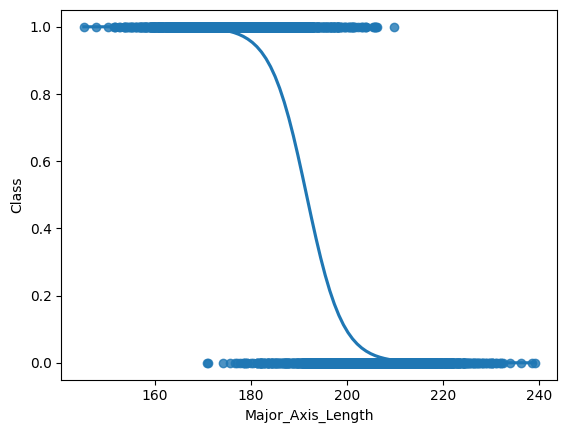

In [ ]:
#plot logistic regression curve
x = rice['Major_Axis_Length']
y = rice['Class']
#plot logistic regression curve with black points and red line
sns.regplot(x=x, y=y, data=rice, logistic=True, ci=None)

Evaluation of the model

In [ ]:
predictions = ricelr.predict(X_test)

In [ ]:
#evaluating the performance using classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Cammeo       0.92      0.91      0.92       479
    Osmancik       0.94      0.95      0.94       664

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



Text(0.5, 25.722222222222214, 'Predicted label')

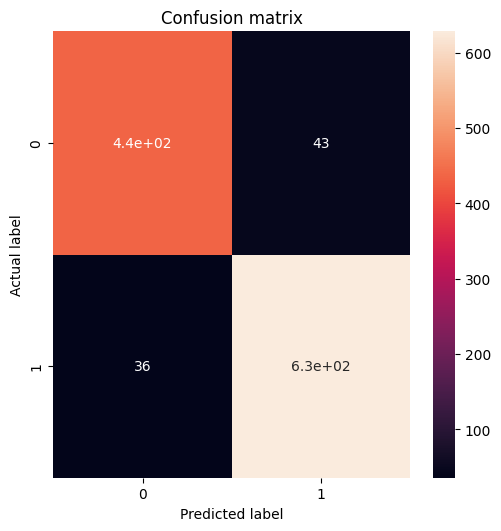

In [ ]:
#evaluating the performance using confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True)

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix shows that there are 440 instances that are predicted as class 0 that really belongs to class 0, 43 instances where predicted by the model as class 1 but are in class 0, 36 instances that were predicted as class 0 but are in class 1 and 630 instances that were predicted as class 1 and are actually class 1.

In [ ]:
#evaluating the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.9308836395450568


## **Decision Tree**

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import dataset from uci

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
X.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320


In [ ]:
y.head(10)

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
5,Cammeo
6,Cammeo
7,Cammeo
8,Cammeo
9,Cammeo


Combine features and targets dataframes

In [ ]:
rice = pd.concat([X, y], axis=1, join='inner')
rice.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [ ]:
rice.tail(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
3800,11611,431.273010,178.513947,84.112518,0.882036,11775,0.691913,Osmancik
3801,10604,409.510986,172.302704,78.918831,0.888940,10755,0.586180,Osmancik
3802,12349,434.138000,180.241928,88.264580,0.871891,12526,0.627490,Osmancik
3803,11538,418.661011,170.850906,86.498398,0.862369,11741,0.713544,Osmancik
3804,12501,451.799011,192.738800,83.195061,0.902043,12687,0.718820,Osmancik
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012,Osmancik
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279,Osmancik
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739,Osmancik
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064,Osmancik
3809,11434,404.709992,161.079269,90.868195,0.825692,11591,0.802949,Osmancik


In [ ]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


Check the pairplot of the data

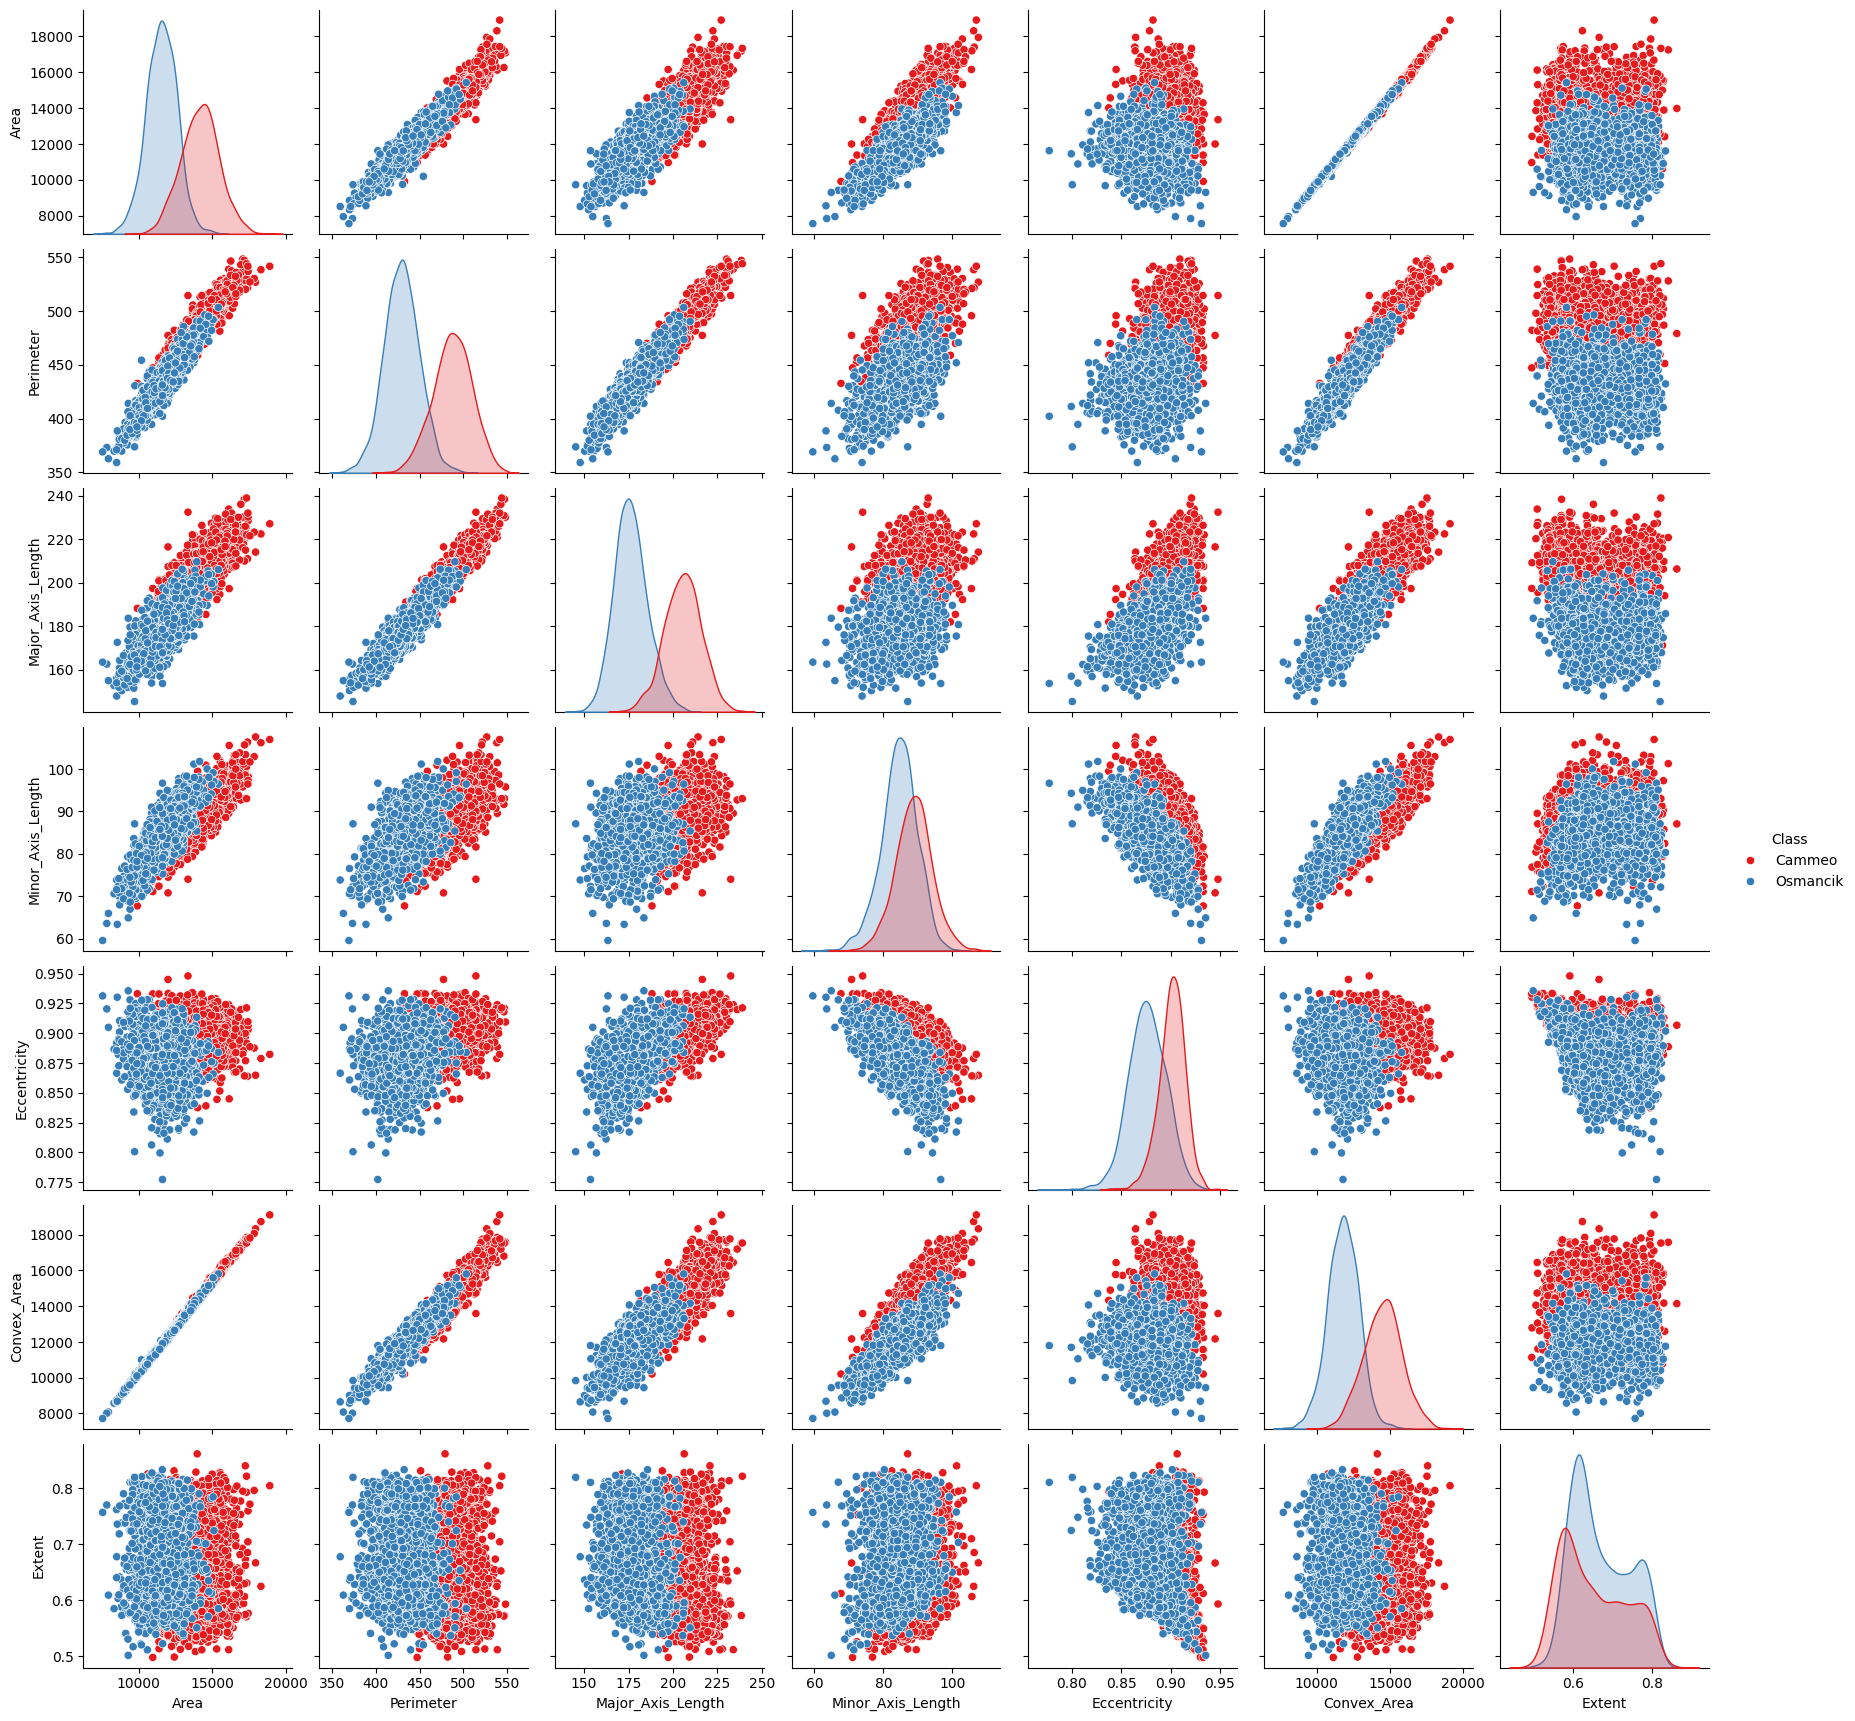

In [ ]:
sns.pairplot(rice,hue='Class',palette='Set1')

The pairplot shows the relationship between the Features and the class of Rice. It also shows the difference between the two classes of Rice wherein if the rice has an area greater than 14000, it would be classified as Osmancik and Cammeo if it has less.

Change the values of Class to binary values (1 and 0)

0 - Cammeo<br>
1 - Osmancik

In [ ]:
rice["Class"] = rice["Class"].apply(lambda toLabel: 0 if toLabel == 'Cammeo' else 1)

Split the data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Train a single decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

ricetree = DecisionTreeClassifier()
ricetree.fit(X_train,y_train)

DecisionTreeClassifier()

Determine the number of nodes and the max depth

In [ ]:
ricetree.tree_.node_count, ricetree.tree_.max_depth

(399, 22)

Predict and evaluate the model

In [ ]:
predictions = ricetree.predict(X_test)

In [ ]:
#evaluating the performance using classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Cammeo       0.86      0.88      0.87       485
    Osmancik       0.91      0.90      0.90       658

    accuracy                           0.89      1143
   macro avg       0.89      0.89      0.89      1143
weighted avg       0.89      0.89      0.89      1143



Text(0.5, 25.722222222222214, 'Predicted label')

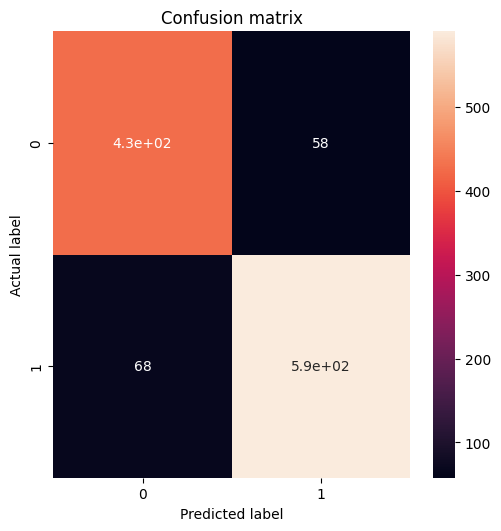

In [ ]:
#evaluating the performance using confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True)

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix shows that there are 430 instances that are predicted as class 0 that really belongs to class 0, 58 instances where predicted by the model as class 1 but are in class 0, 68 instances that were predicted as class 0 but are in class 1 and 590 instances that were predicted as class 1 and are actually class 1.

In [ ]:
#evaluating the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.889763779527559


89% is the accuracy of the model in predicting the target values

Visualization of the model

In [ ]:
target = rice["Class"].values
columns = ['Area','Perimeter','Major_Axis_Length','Minor_Axis_Length','Eccentricity','Convex_Area','Extent']
features = rice[list(columns)].values

In [ ]:
from sklearn import tree

clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)
clf_train = clf_train.fit(features,target)

In [ ]:
clf_train.score(features,target)

0.9286089238845144

In [ ]:
from six import StringIO

with open('/rice.dot','w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns)

In [ ]:
!apt install graphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
!dot -Tpng /rice.dot -o /rice.png

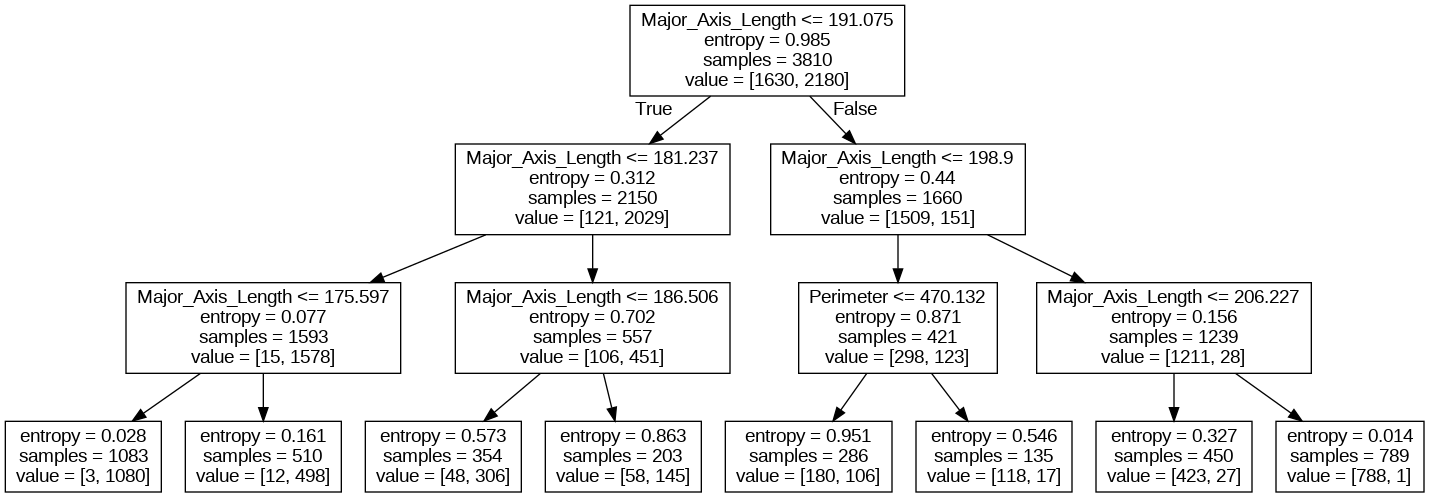

In [ ]:
from IPython.display import Image

Image('/rice.png')

This decision tree shows that the Major Axis Length has the strongest correlation in deciding for the Class of the rice. As we can see, a little bit of changes in the value of Major Axis Length could have a difference in which class the rice may be classified.

## **Random Forest**

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Import the dataset from uci

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
rice_cammeo_and_osmancik = fetch_ucirepo(id=545)

# data (as pandas dataframes)
X = rice_cammeo_and_osmancik.data.features
y = rice_cammeo_and_osmancik.data.targets

# metadata
print(rice_cammeo_and_osmancik.metadata)

# variable information
print(rice_cammeo_and_osmancik.variables)

{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'published_in': 'International Journal of Intelligent Systems and App

In [ ]:
X.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024


In [ ]:
y.head()

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo


Combine features and target

In [ ]:
rice = pd.concat([X, y], axis=1, join='inner')
rice.head(10)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897,Cammeo
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708,Cammeo
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888,Cammeo
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651,Cammeo
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320,Cammeo


In [ ]:
y.value_counts()

Class   
Osmancik    2180
Cammeo      1630
dtype: int64

Determine the number of datapoints, columns, and data types.

In [ ]:
print(rice.value_counts())

Area   Perimeter   Major_Axis_Length  Minor_Axis_Length  Eccentricity  Convex_Area  Extent    Class   
7551   369.063995  163.408829         59.532406          0.931275      7723         0.756462  Osmancik    1
13387  458.955994  180.400818         95.742058          0.847548      13653        0.632955  Osmancik    1
13352  514.487000  232.480209         73.986763          0.948007      13585        0.592816  Cammeo      1
13355  466.316010  193.728683         88.697304          0.889033      13597        0.605422  Osmancik    1
13361  456.744995  183.196274         93.641106          0.859490      13610        0.685601  Osmancik    1
                                                                                                         ..
11732  428.183014  172.962967         86.986900          0.864332      11900        0.631092  Osmancik    1
       433.864014  173.958084         86.974655          0.866040      12054        0.629602  Osmancik    1
       441.122986  176.483490    

Change the values of Class to binary values (1 and 0)

0 - Cammeo<br>
1 - Osmancik

In [ ]:
rice["Class"] = rice["Class"].apply(lambda toLabel: 0 if toLabel == 'Cammeo' else 1)

<Axes: xlabel='Class', ylabel='count'>

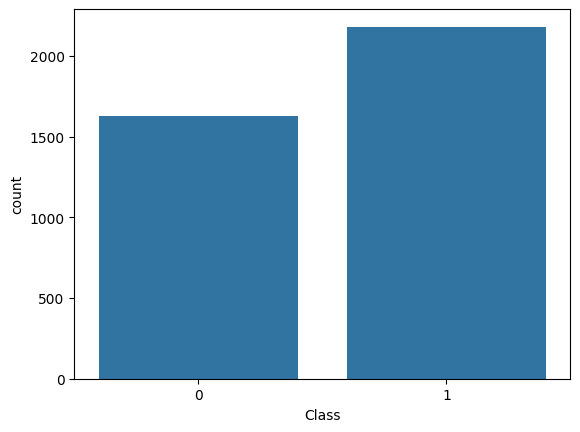

In [ ]:
sns.countplot(x = 'Class', data = rice)

<Figure size 1100x700 with 0 Axes>

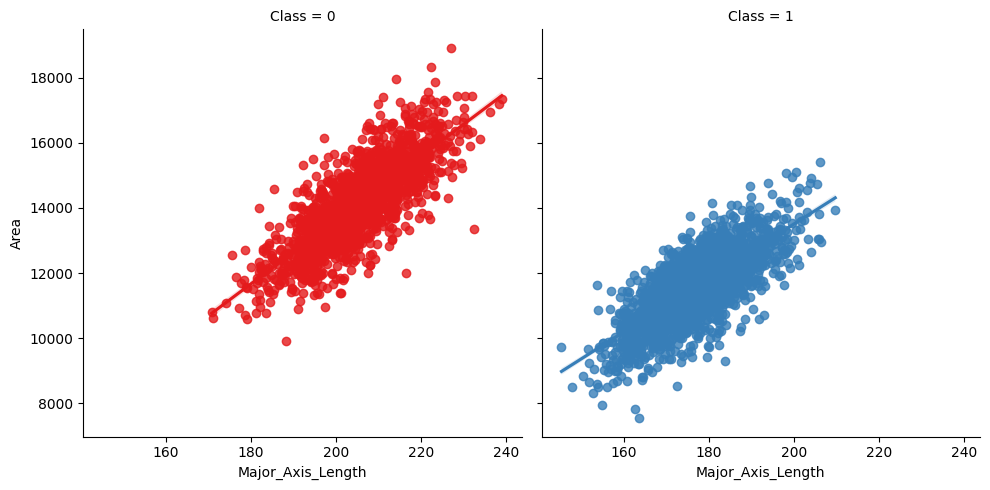

In [ ]:
plt.figure(figsize=(11,7))
sns.lmplot(y='Area',x='Major_Axis_Length',data=rice,hue='Class',
            col='Class', palette='Set1')

This figure represents the linear regression in which we can say that there is a strong relationship between the area and the major axis length for both class.

<Axes: xlabel='Area', ylabel='Perimeter'>

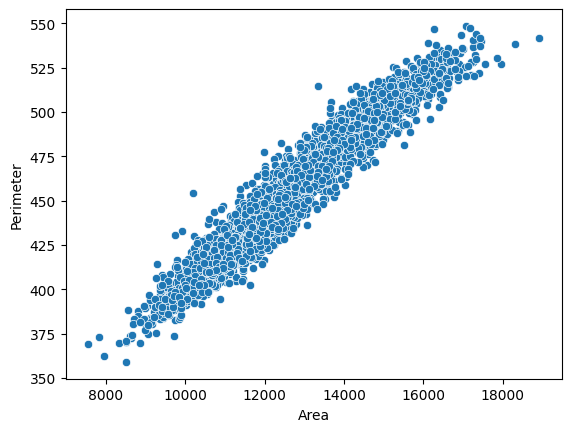

In [ ]:
sns.scatterplot(x="Area",
                    y="Perimeter",
                    data=rice)

This scatterplot represents the relationship between the area and the perimeter in which we can say that there is a strong relationship between the two because as the area becomes lower, the perimeter also becomes lower and vice versa.

Visualization of the model

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
X_train.shape, X_test.shape

((2552, 7), (1258, 7))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
ricerf = RandomForestClassifier(n_estimators=600, random_state=0)

In [ ]:
ricerf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600, random_state=0)

In [ ]:
predictions = ricerf.predict(X_test)

Classification report

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_auc_score
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       568
           1       0.91      0.95      0.93       690

    accuracy                           0.92      1258
   macro avg       0.92      0.92      0.92      1258
weighted avg       0.92      0.92      0.92      1258



The classification report shows that the accuracy of the model to the dataset is 92%. The precision is 94% on class 0 (Cammeo) and 91% on class 1 (Osmancik)

Text(0.5, 25.722222222222214, 'Predicted label')

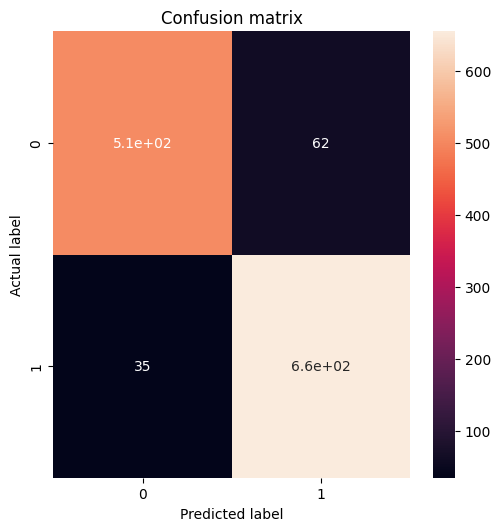

In [ ]:
#evaluation through confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, predictions)), annot=True)

plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

The confusion matrix shows that there are 510 instances that are predicted as class 0 that really belongs to class 0, 62 instances where predicted by the model as class 1 but are in class 0, 35 instances that were predicted as class 0 but are in class 1 and 660 instances that were predicted as class 1 and are actually class 1.

In [ ]:
#evaluate the performance using accuracy score
print(accuracy_score(y_test, predictions))

0.9228934817170111


This shows that the accuracy of this model to this dataset is 92%

In [ ]:
print(roc_auc_score(y_test, predictions))

0.9200602163706879


ROC AUC score is an alternative way to measure the accuracy of a model to a given dataset, which is in this case is 92%

In [ ]:
acc_scores = []
estimators_values = list(range(100,1100,100))

In [ ]:
for n_estimators in estimators_values:
  ricerf = RandomForestClassifier(criterion = 'gini', max_depth=6, n_estimators=n_estimators, random_state=42)
  ricerf.fit(X_train, y_train)
  y_pred = ricerf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  acc_scores.append(accuracy)

<function matplotlib.pyplot.show(close=None, block=None)>

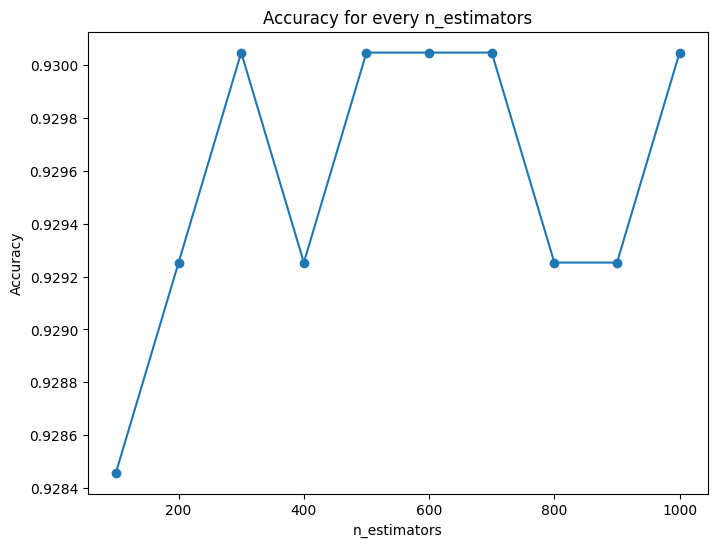

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(estimators_values, acc_scores, marker='o')
plt.title('Accuracy for every n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.show()

This plot shows the accuracy of each number of estimators. The lower the estimators, the lower the accuracy becomes.The highest accuracy reached was 93% and after reaching 200, the accuracy only went down to 92.93% as its lowest.

Dataset used: Rice (Cammeo and Osmancik). (2019). UCI Machine Learning Repository. https://doi.org/10.24432/C5MW4Z.